In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('prima-indians-diabetes.data',header=None)
values=data.values

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
type(values)

numpy.ndarray

In [6]:
data.shape

(768, 9)

In [9]:
prod_data=values[700:,]
prod_data.shape
values=values[:700,]
values.shape

(700, 9)

In [7]:
my_mod1=LogisticRegression()
my_mod2=GaussianNB()

In [10]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=my_mod1,n_estimators=100, max_samples= .5, bootstrap=True, oob_score=False)
bgcl.fit(values[:,:-1],values[:,-1])
#bgcl.oob_score_     ### testing the ensemble against OOB
#bgcl.score(test_set , test_labels) # use this if you have reserved any dataset for testing

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [11]:
#In production any unseen new snapshot of data can be used for testing 
production_pred = bgcl.predict(prod_data[:,:-1])
production_pred


array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
prod_data[:,-1]

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [13]:
acc=metrics.accuracy_score(prod_data[:,-1],production_pred)
acc*100

77.94117647058823

In [14]:
cr=metrics.classification_report(prod_data[:,-1],production_pred)
print(cr)

             precision    recall  f1-score   support

        0.0       0.76      0.93      0.84        41
        1.0       0.83      0.56      0.67        27

avg / total       0.79      0.78      0.77        68



In [15]:
cm=metrics.confusion_matrix(prod_data[:,-1],production_pred)
print(cm)

[[38  3]
 [12 15]]


In [18]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier(base_estimator=my_mod1,n_estimators= 100)
abcl.fit(values[:,:-1],values[:,-1])
#abcl.score(test_set , test_labels)# use this if you have reserved any dataset for testing


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [19]:
y_pred_boost = abcl.predict(prod_data[:,:-1])
y_pred_boost

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
metrics.accuracy_score(prod_data[:,-1],y_pred_boost)

0.75

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 10, learning_rate = .01)
gbcl.fit(values[:,:-1],values[:,-1])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
y_predict=gbcl.predict(prod_data[:,:-1])
metrics.accuracy_score(prod_data[:,-1],y_predict)

0.6029411764705882

In [32]:
cr=metrics.classification_report(prod_data[:,-1],y_predict)
print(cr)

             precision    recall  f1-score   support

        0.0       0.60      1.00      0.75        41
        1.0       0.00      0.00      0.00        27

avg / total       0.36      0.60      0.45        68



/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
from sklearn.metrics import roc_curve, auc

Area Under the curve 0.7411924119241193


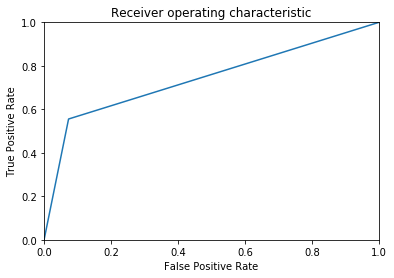

In [34]:
fpr,tpr, _ = roc_curve(prod_data[:,-1],production_pred)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [35]:
from xgboost import XGBClassifier

In [36]:
xg_model=XGBClassifier()
xg_model.fit(values[:,:-1],values[:,-1])
y2_predict=xg_model.predict(prod_data[:,:-1])
metrics.accuracy_score(prod_data[:,-1],y2_predict)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7647058823529411